In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import encodings_solution_1, encodings_solution_2

In this notebook, you'll be working with the Pokémon dataset from the univariate plots lesson.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               807 non-null    int64  
 1   species          807 non-null    object 
 2   generation_id    807 non-null    int64  
 3   height           807 non-null    float64
 4   weight           807 non-null    float64
 5   base_experience  807 non-null    int64  
 6   type_1           807 non-null    object 
 7   type_2           405 non-null    object 
 8   hp               807 non-null    int64  
 9   attack           807 non-null    int64  
 10  defense          807 non-null    int64  
 11  speed            807 non-null    int64  
 12  special-attack   807 non-null    int64  
 13  special-defense  807 non-null    int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 88.4+ KB


**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

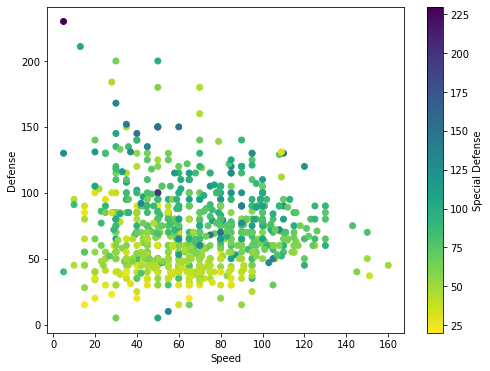

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(data=pokemon, x='speed', y='defense', c='special-defense', cmap='viridis_r')
plt.colorbar(label='Special Defense')
plt.xlabel('Speed')
plt.ylabel('Defense');

When creating the plot, I made the figure size bigger and set axis limits to zoom into the majority of data points. I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.


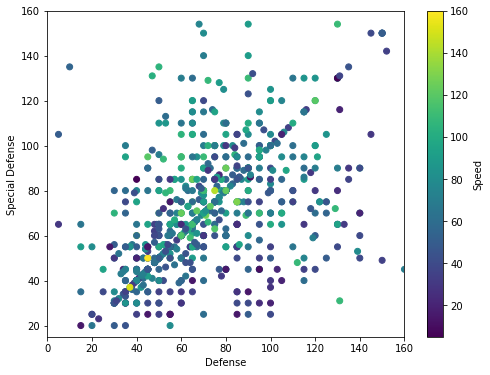

In [3]:
# run this cell to check your work against ours
encodings_solution_1()

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [10]:
pokemon.head(2)

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80


In [8]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


In [9]:
non_type_cols

Index(['attack', 'base_experience', 'defense', 'generation_id', 'height', 'hp',
       'id', 'special-attack', 'special-defense', 'species', 'speed',
       'weight'],
      dtype='object')

In [11]:
pkmn_types.type.value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [23]:
# df = pkmn_types[(pkmn_types['type'] == 'fairy') | (pkmn_types['type'] == 'dragon')]
df = pkmn_types.loc[pkmn_types['type'].isin(['fairy', 'dragon'])]
df.sample(5)

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
783,110,270,125,7,1.6,75,784,100,105,kommo-o,85,78.2,type_1,dragon
845,45,95,20,1,0.5,115,39,45,25,jigglypuff,20,5.5,type_2,fairy
1536,74,239,74,7,1.8,80,730,126,116,primarina,60,44.0,type_2,fairy
989,20,88,50,2,0.4,70,183,20,50,marill,40,8.5,type_2,fairy
668,38,61,39,6,0.1,44,669,61,79,flabebe,42,0.1,type_1,fairy


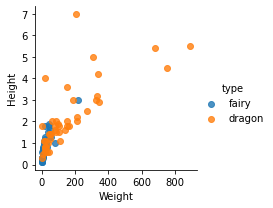

In [18]:
g = sb.FacetGrid(data=df, hue='type')
g = g.map(sb.regplot, 'weight', 'height', fit_reg=False)
g.add_legend()
plt.xlabel('Weight')
plt.ylabel('Height');

In [20]:
df.weight.describe()

count     92.000000
mean      86.643478
std      154.770876
min        0.100000
25%        6.600000
50%       22.350000
75%       87.500000
max      888.000000
Name: weight, dtype: float64

In [21]:
np.log10(df.weight.describe())

count    1.963788
mean     1.937736
std      2.189689
min     -1.000000
25%      0.819544
50%      1.349278
75%      1.942008
max      2.948413
Name: weight, dtype: float64

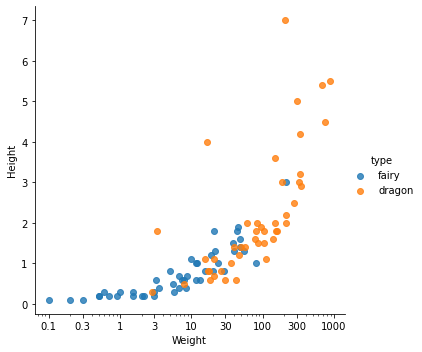

In [26]:
g = sb.FacetGrid(data=df, hue='type', height=5)
g = g.map(sb.regplot, 'weight', 'height', fit_reg=False)
plt.xscale('log')
x_ticks=[0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
g.set(xticks=x_ticks, xticklabels=x_ticks)
g.add_legend()
plt.xlabel('Weight')
plt.ylabel('Height');

After subsetting the data, I used FacetGrid to set up and generate the plot. I used the .set() method for FacetGrid objects to set the x-scaling and tick marks. The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.


/Users/meng/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


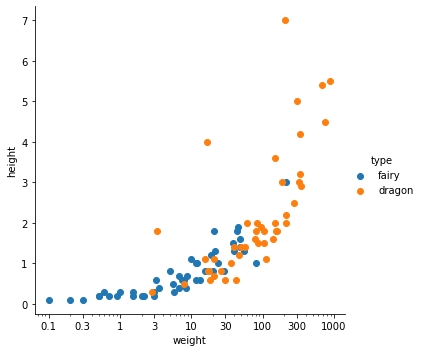

In [15]:
# run this cell to check your work against ours
encodings_solution_2()